<a id='section_id1'></a>
# Weather Data Exploratory Data Analysis


[Click here to download latest rain data](http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=086338&p_c=-1490990496&p_nccObsCode=136&p_startYear=2020)   
[Click here to download latest max temp data](http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=086338&p_c=-1490987607&p_nccObsCode=122&p_startYear=2020)   
[Click here to download latest min temp data](http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=086338&p_c=-1490987803&p_nccObsCode=123&p_startYear=2020)   
[Click here to download latest solar exposure data](http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=086338&p_c=-1491005499&p_nccObsCode=193&p_startYear=2020)   

[Click Here for Report Notebook](report.ipynb#section_id1)

In [1]:
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt

In [2]:
rainfall = pd.read_csv('../data/training_data/rainfall.csv',infer_datetime_format=True,index_col=0)
solar_exposure = pd.read_csv('../data/training_data/solar_exposure.csv',infer_datetime_format=True,index_col=0)
max_temps = pd.read_csv('../data/training_data/max_temps.csv',infer_datetime_format=True,index_col=0)
min_temps = pd.read_csv('../data/training_data/min_temps.csv',infer_datetime_format=True,index_col=0)

### Each dataframe has a seperate 'Year', 'Month', 'Day' column as intergers.
To merge the data into a single dataframe, make the index's datetime.

Solar Exposure has the longest date index, so it will be our primary file.

## Rainfall EDA

Lowercase column names for simplicity

In [3]:
rainfall.columns = map(str.lower, rainfall.columns)
list(rainfall.columns)

['bureau of meteorology station number',
 'year',
 'month',
 'day',
 'rainfall amount (millimetres)',
 'period over which rainfall was measured (days)',
 'quality']

Remove columns with a single value

In [4]:
for column in rainfall.columns:
    print(f'{column} has {rainfall[column].nunique()} unique values')
rainfall.drop(['bureau of meteorology station number','period over which rainfall was measured (days)'],axis=1,inplace=True)
rainfall.head(2)

bureau of meteorology station number has 1 unique values
year has 8 unique values
month has 12 unique values
day has 31 unique values
rainfall amount (millimetres) has 112 unique values
period over which rainfall was measured (days) has 1 unique values
quality has 2 unique values


year  month  day  rainfall amount (millimetres) quality
Product code                                                         
IDCJAC0009    2013      1    1                            NaN     NaN
IDCJAC0009    2013      1    2                            NaN     NaN

Seperate dates are useful but also cumbersome for filtering. Merging dates into 1 column.

In [5]:
rainfall['date']=pd.to_datetime(rainfall[['year','month','day']])
rainfall.index= rainfall['date'] # set index as well.
rainfall.head(2)

year  month  day  rainfall amount (millimetres) quality       date
date                                                                          
2013-01-01  2013      1    1                            NaN     NaN 2013-01-01
2013-01-02  2013      1    2                            NaN     NaN 2013-01-02

## Max Temp EDA

Lowercase column names for simplicity

In [6]:
max_temps.columns = map(str.lower, max_temps.columns)
list(max_temps.columns)

['bureau of meteorology station number',
 'year',
 'month',
 'day',
 'maximum temperature (degree c)',
 'days of accumulation of maximum temperature',
 'quality']

Remove columns with a single value

In [7]:
for column in max_temps.columns:
    print(f'{column} has {max_temps[column].nunique()} unique values')
max_temps.drop(['bureau of meteorology station number','days of accumulation of maximum temperature'],axis=1,inplace=True)
max_temps.head(2)

bureau of meteorology station number has 1 unique values
year has 8 unique values
month has 12 unique values
day has 31 unique values
maximum temperature (degree c) has 294 unique values
days of accumulation of maximum temperature has 1 unique values
quality has 2 unique values


year  month  day  maximum temperature (degree c) quality
Product code                                                          
IDCJAC0010    2013      1    1                             NaN     NaN
IDCJAC0010    2013      1    2                             NaN     NaN

Seperate dates are useful but also cumbersome for filtering. Merging dates into 1 column.

In [8]:
max_temps['date'] = pd.to_datetime(max_temps[['year','month','day']])
max_temps.index = max_temps['date'] # set index as well.
max_temps.head(2)

year  month  day  maximum temperature (degree c) quality  \
date                                                                   
2013-01-01  2013      1    1                             NaN     NaN   
2013-01-02  2013      1    2                             NaN     NaN   

                 date  
date                   
2013-01-01 2013-01-01  
2013-01-02 2013-01-02

## Min Temp EDA

Lowercase column names for simplicity

In [9]:
min_temps.columns = map(str.lower, min_temps.columns)
list(min_temps.columns)

['bureau of meteorology station number',
 'year',
 'month',
 'day',
 'minimum temperature (degree c)',
 'days of accumulation of minimum temperature',
 'quality']

Remove columns with a single value

In [10]:
for column in min_temps.columns:
    print(f'{column} has {min_temps[column].nunique()} unique values')
min_temps.drop(['bureau of meteorology station number','days of accumulation of minimum temperature'],axis=1,inplace=True)
min_temps.head(2)

bureau of meteorology station number has 1 unique values
year has 8 unique values
month has 12 unique values
day has 31 unique values
minimum temperature (degree c) has 223 unique values
days of accumulation of minimum temperature has 1 unique values
quality has 2 unique values


year  month  day  minimum temperature (degree c) quality
Product code                                                          
IDCJAC0011    2013      1    1                             NaN     NaN
IDCJAC0011    2013      1    2                             NaN     NaN

Seperate dates are useful but also cumbersome for filtering. Merging dates into 1 column.

In [11]:
min_temps['date'] = pd.to_datetime(min_temps[['year','month','day']])
min_temps.index = min_temps['date'] # set index as well.
min_temps.head(2)

year  month  day  minimum temperature (degree c) quality  \
date                                                                   
2013-01-01  2013      1    1                             NaN     NaN   
2013-01-02  2013      1    2                             NaN     NaN   

                 date  
date                   
2013-01-01 2013-01-01  
2013-01-02 2013-01-02

## Solar Exposure EDA

Lowercase column names for simplicity

In [12]:
solar_exposure.columns = map(str.lower, solar_exposure.columns)
list(solar_exposure.columns)

['bureau of meteorology station number',
 'year',
 'month',
 'day',
 'daily global solar exposure (mj/m*m)']

Remove columns with a single value

In [13]:
for column in solar_exposure.columns:
    print(f'{column} has {solar_exposure[column].nunique()} unique values')
solar_exposure.drop(['bureau of meteorology station number'],axis=1,inplace=True)
solar_exposure.head(2)

bureau of meteorology station number has 1 unique values
year has 31 unique values
month has 12 unique values
day has 31 unique values
daily global solar exposure (mj/m*m) has 354 unique values


year  month  day  daily global solar exposure (mj/m*m)
Product code                                                        
IDCJAC0016    1990      1    1                                  32.4
IDCJAC0016    1990      1    2                                  31.1

Seperate dates are useful but also cumbersome for filtering. Merging dates into 1 column.

In [14]:
solar_exposure['date'] = pd.to_datetime(solar_exposure[['year','month','day']])
solar_exposure.index = solar_exposure['date'] # set index as well.
solar_exposure.head(2)

year  month  day  daily global solar exposure (mj/m*m)       date
date                                                                         
1990-01-01  1990      1    1                                  32.4 1990-01-01
1990-01-02  1990      1    2                                  31.1 1990-01-02

### EDA done, check the shape of the files

In [15]:
print(f'Shape of Rainfall:		{rainfall.shape}')
print(f'Shape of Max Temps:		{max_temps.shape}')
print(f'Shape of Solar Exposure:	{solar_exposure.shape}')

Shape of Rainfall:		(2839, 6)
Shape of Max Temps:		(2838, 6)
Shape of Solar Exposure:	(11239, 5)


### Solar Exposure has the largest range of date index's, so we'll use that as a our base file.

In [16]:
weather = pd.merge(solar_exposure, max_temps, how='left', left_index=True, right_index=True, suffixes=('_se', '_maxt'))

In [17]:
weather = pd.merge(weather, min_temps, how='left', left_index=True, right_index=True, suffixes=('_maxt', '_mint'))

In [18]:
weather = pd.merge(weather, rainfall, how='left', left_index=True, right_index=True, suffixes=('_w', '_rf'))

In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11239 entries, 1990-01-01 to 2020-10-08
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   year_se                               11239 non-null  int64         
 1   month_se                              11239 non-null  int64         
 2   day_se                                11239 non-null  int64         
 3   daily global solar exposure (mj/m*m)  10763 non-null  float64       
 4   date_se                               11239 non-null  datetime64[ns]
 5   year_maxt                             2838 non-null   float64       
 6   month_maxt                            2838 non-null   float64       
 7   day_maxt                              2838 non-null   float64       
 8   maximum temperature (degree c)        2687 non-null   float64       
 9   quality_maxt                          2686 non-null   o

Clean up the file and remove redundant columns.

In [20]:
weather.columns

Index(['year_se', 'month_se', 'day_se', 'daily global solar exposure (mj/m*m)',
       'date_se', 'year_maxt', 'month_maxt', 'day_maxt',
       'maximum temperature (degree c)', 'quality_maxt', 'date_maxt', 'year_w',
       'month_w', 'day_w', 'minimum temperature (degree c)', 'quality_mint',
       'date_w', 'year_rf', 'month_rf', 'day_rf',
       'rainfall amount (millimetres)', 'quality', 'date_rf'],
      dtype='object')

In [21]:
weather = weather[['rainfall amount (millimetres)', 'quality', 'minimum temperature (degree c)', 'quality_mint',  'maximum temperature (degree c)', 'quality_maxt', 'daily global solar exposure (mj/m*m)']]

In [22]:
weather.info()
weather.head().append(weather.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11239 entries, 1990-01-01 to 2020-10-08
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   rainfall amount (millimetres)         2683 non-null   float64
 1   quality                               2683 non-null   object 
 2   minimum temperature (degree c)        2686 non-null   float64
 3   quality_mint                          2686 non-null   object 
 4   maximum temperature (degree c)        2687 non-null   float64
 5   quality_maxt                          2686 non-null   object 
 6   daily global solar exposure (mj/m*m)  10763 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1022.4+ KB


rainfall amount (millimetres) quality  \
date                                                
1990-01-01                            NaN     NaN   
1990-01-02                            NaN     NaN   
1990-01-03                            NaN     NaN   
1990-01-04                            NaN     NaN   
1990-01-05                            NaN     NaN   
2020-10-04                            0.0       N   
2020-10-05                           12.8       N   
2020-10-06                            1.0       N   
2020-10-07                            3.2       N   
2020-10-08                            5.4       N   

            minimum temperature (degree c) quality_mint  \
date                                                      
1990-01-01                             NaN          NaN   
1990-01-02                             NaN          NaN   
1990-01-03                             NaN          NaN   
1990-01-04                             NaN          NaN   
1990-01-05                             NaN          NaN   
2020-10-04                            13.5            N   
2020-10-05                             9.1            N   
2020-10-06                             8.9            N   
2020-10-07                            10.1            N   
2020-10-08                            11.4            N   

            maximum temperature (degree c) quality_maxt  \
date                                                      
1990-01-01                             NaN          NaN   
1990-01-02                             NaN          NaN   
1990-01-03                             NaN          NaN   
1990-01-04                             NaN          NaN   
1990-01-05                             NaN          NaN   
2020-10-04                            29.5            N   
2020-10-05                            12.7            N   
2020-10-06                            12.6            N   
2020-10-07                            17.2            N   
2020-10-08                            16.9            N   

            daily global solar exposure (mj/m*m)  
date                                              
1990-01-01                                  32.4  
1990-01-02                                  31.1  
1990-01-03                                   NaN  
1990-01-04                                  30.8  
1990-01-05                                  30.1  
2020-10-04                                   8.4  
2020-10-05                                   7.3  
2020-10-06                                   5.8  
2020-10-07                                   8.6  
2020-10-08                                   9.7

We have Y/N columns that can be binarized, but NaN's must be respected

In [23]:
weather.rename(columns={'quality':'quality_rf'}, inplace=True) # Rain quality needs an identifier
weather['quality_rf'] = weather['quality_rf'].map(dict(Y=1, N=0))
weather['quality_maxt'] = weather['quality_maxt'].map(dict(Y=1, N=0))
weather['quality_mint'] = weather['quality_mint'].map(dict(Y=1, N=0))
weather

rainfall amount (millimetres)  quality_rf  \
date                                                    
1990-01-01                            NaN         NaN   
1990-01-02                            NaN         NaN   
1990-01-03                            NaN         NaN   
1990-01-04                            NaN         NaN   
1990-01-05                            NaN         NaN   
...                                   ...         ...   
2020-10-04                            0.0         0.0   
2020-10-05                           12.8         0.0   
2020-10-06                            1.0         0.0   
2020-10-07                            3.2         0.0   
2020-10-08                            5.4         0.0   

            minimum temperature (degree c)  quality_mint  \
date                                                       
1990-01-01                             NaN           NaN   
1990-01-02                             NaN           NaN   
1990-01-03                             NaN           NaN   
1990-01-04                             NaN           NaN   
1990-01-05                             NaN           NaN   
...                                    ...           ...   
2020-10-04                            13.5           0.0   
2020-10-05                             9.1           0.0   
2020-10-06                             8.9           0.0   
2020-10-07                            10.1           0.0   
2020-10-08                            11.4           0.0   

            maximum temperature (degree c)  quality_maxt  \
date                                                       
1990-01-01                             NaN           NaN   
1990-01-02                             NaN           NaN   
1990-01-03                             NaN           NaN   
1990-01-04                             NaN           NaN   
1990-01-05                             NaN           NaN   
...                                    ...           ...   
2020-10-04                            29.5           0.0   
2020-10-05                            12.7           0.0   
2020-10-06                            12.6           0.0   
2020-10-07                            17.2           0.0   
2020-10-08                            16.9           0.0   

            daily global solar exposure (mj/m*m)  
date                                              
1990-01-01                                  32.4  
1990-01-02                                  31.1  
1990-01-03                                   NaN  
1990-01-04                                  30.8  
1990-01-05                                  30.1  
...                                          ...  
2020-10-04                                   8.4  
2020-10-05                                   7.3  
2020-10-06                                   5.8  
2020-10-07                                   8.6  
2020-10-08                                   9.7  

[11239 rows x 7 columns]

Double check 

In [24]:
print(f"Qualtiy RF MINT and MAXT have {weather['quality_rf'].nunique()}/2, {weather['quality_mint'].nunique()}/2 and {weather['quality_maxt'].nunique()}/2  unique values")

Qualtiy RF MINT and MAXT have 2/2, 2/2 and 2/2  unique values


Finally, we want to convert solar_exposure values to UV index values (max 40 vs max 12)

In [25]:
weather['daily global solar exposure (mj/m*m)'] = [((i - 0) / (40 - 0)) * (12 - 0) + 0 for i in weather['daily global solar exposure (mj/m*m)']]

In [26]:
print(weather['daily global solar exposure (mj/m*m)'].max()) # Should not be more than 12.

10.89


### Define Cutoff Dates

First day in the data index is 1990-01-01 00:00:00.


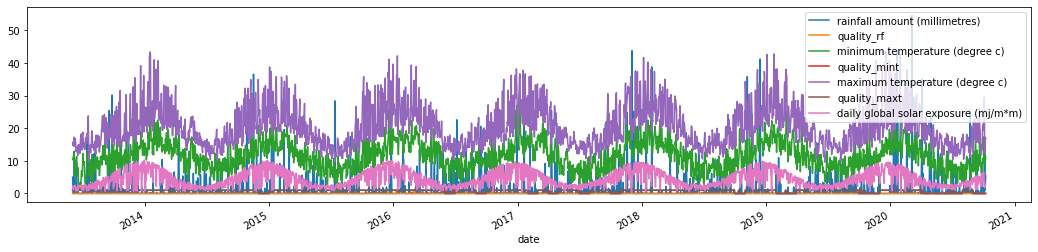

In [27]:
print(f'First day in the data index is {weather.index[0]}.')
weather.dropna().plot(figsize=(18,4));

It appears that only from mid 2013 we have consistent data

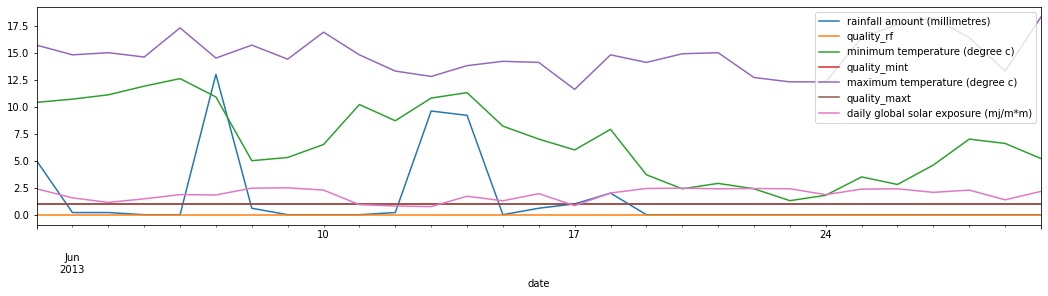

In [28]:
weather['20130501':'20130630'].dropna().plot(figsize=(18,4));

Data appears to start on the 2013-2-6   
Removing all data before June 2nd 2013

In [29]:
weather = weather[weather.index > '20130601']
weather.head(2)

rainfall amount (millimetres)  quality_rf  \
date                                                    
2013-06-02                            5.0         0.0   
2013-06-03                            0.2         0.0   

            minimum temperature (degree c)  quality_mint  \
date                                                       
2013-06-02                            10.4           1.0   
2013-06-03                            10.7           1.0   

            maximum temperature (degree c)  quality_maxt  \
date                                                       
2013-06-02                            15.7           1.0   
2013-06-03                            14.8           1.0   

            daily global solar exposure (mj/m*m)  
date                                              
2013-06-02                                  2.40  
2013-06-03                                  1.56

## Fill missing values with multivariate imputer (Experimental)
We only have a couple of missing values, so it's worth a try.

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(weather)
IterativeImputer(random_state=0)
X_test = weather
# the model learns that the second feature is double the first
imp_weather = np.round(imp.transform(X_test))
imp_weather = pd.DataFrame(imp_weather, columns=weather.columns, index=weather.index)
imp_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2686 entries, 2013-06-02 to 2020-10-08
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   rainfall amount (millimetres)         2686 non-null   float64
 1   quality_rf                            2686 non-null   float64
 2   minimum temperature (degree c)        2686 non-null   float64
 3   quality_mint                          2686 non-null   float64
 4   maximum temperature (degree c)        2686 non-null   float64
 5   quality_maxt                          2686 non-null   float64
 6   daily global solar exposure (mj/m*m)  2686 non-null   float64
dtypes: float64(7)
memory usage: 167.9 KB


Rename columns to something more useable and final. Note: uv_index to reflect new scale.

In [31]:
imp_weather.columns = ['rainfall_mm', 'quality_rf', 'min_temp_c', 'quality_mint', 'max_temp_c', 'quality_maxt', 'uv_index']
imp_weather.head(2)

rainfall_mm  quality_rf  min_temp_c  quality_mint  max_temp_c  \
date                                                                        
2013-06-02          5.0         0.0        10.0           1.0        16.0   
2013-06-03          0.0         0.0        11.0           1.0        15.0   

            quality_maxt  uv_index  
date                                
2013-06-02           1.0       2.0  
2013-06-03           1.0       2.0

### Save File!

In [32]:
imp_weather.to_csv('../data/weather.csv')

## Fetch New Weather from API

In [33]:
import requests

In [34]:
url = 'https://api.weather.bom.gov.au/v1/locations/r1r143/forecasts/daily'
response = requests.get(url)
weather_dict = response.json() # format as json
print(weather_dict.keys())

dict_keys(['data', 'metadata'])


In [35]:
tomorrow_max = weather_dict['data'][1]['temp_max']
tomorrow_min = weather_dict['data'][1]['temp_min']
rain = weather_dict['data'][1]['rain']['amount']['max']# - weather_dict['data'][0]['rain']['amount']['min']
uv = weather_dict['data'][1]['uv']['max_index']
q_rf = 1 # assuming quality data
q_mint = 1 # assuming quality data
q_maxt = 1 # assuming quality data

## Forecast Max Temp with Random Forrest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
y = imp_weather['max_temp_c']
X = imp_weather.drop(['max_temp_c'], axis=1)

regr = RandomForestRegressor(max_depth=3, random_state=42)
regr.fit(X, y)

RandomForestRegressor(max_depth=3, random_state=42)

In [38]:
[predicted_mt] = regr.predict([[rain, q_rf, tomorrow_min, q_mint, q_maxt, uv]]) # sbracket both sides to remove from list.
score = regr.score(X, y) # R^2 (coefficient of determination) regression score function.
print(f'The temperature forecast by the BOM tomorrow is {tomorrow_max} and by our model is {predicted_mt}, with {score:.2f}% accuracy')

The temperature forecast by the BOM tomorrow is 25 and by our model is 25.342048505368158, with 0.61% accuracy


# Head over to report.ipynb for the final result!

In [39]:
# fin